![Imgur](https://imgur.com/GZSklhL.png)

# [DonorsChoose](https://en.wikipedia.org/wiki/DonorsChoose)

DonorsChoose is a United States-based nonprofit organization that allows individuals to donate directly to public school classroom projects. The organization has been given Charity Navigator's highest rating every year since 2005.[4] In January 2018, they announced that 1 million projects had been funded. In 80% of public schools in the United States, at least one project has been requested on DonorsChoose. Schools from wealthy areas are more likely to make technology requests, while schools from less affluent areas are more likely to request basic supplies.[6] It has been noted that repeat donors on DonorsChoose typically donate to projects they have no prior relationship with, and most often fund projects serving financially challenged students.

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

# from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

In [2]:
# THIS IS FOR KAGGLE
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('../input/donorschooseorg-application-screening/'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# project_data = pd.read_csv("../input/donorschooseorg-application-screening/train.csv")
# project_data = pd.read_csv("../input/donorschooseorg-application-screening/train.csv", nrows=5000)

# resource_data =  pd.read_csv('../input/donorschooseorg-application-screening/resources.csv')
# resource_data =  pd.read_csv('../input/donorschooseorg-application-screening/resources.csv', nrows=5000)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## 1.1 Reading Data

In [3]:
project_data = pd.read_csv('../LARGE_Datasets/train.csv')
resource_data = pd.read_csv('../LARGE_Datasets/resources.csv')

In [4]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved'],
      dtype='object')

In [5]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

# 1.2 Data Analysis

Number of projects thar are approved for funding  92706 , ( 84.85830404217927 %)
Number of projects thar are not approved for funding  16542 , ( 15.141695957820739 %)


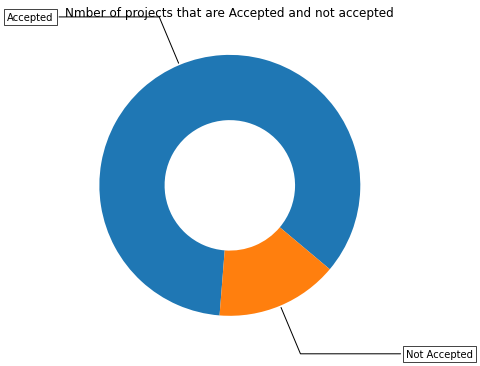

In [7]:
# this code is taken from 
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts = project_data['project_is_approved'].value_counts()
print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Accepted", "Not Accepted"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Nmber of projects that are Accepted and not accepted")

plt.show()

### 1.2.1 Univariate Analysis: School State

In [8]:
# Pandas dataframe grouby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
temp.columns = ['state_code', 'num_proposals']

# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = temp['state_code'],
        z = temp['num_proposals'].astype(float),
        locationmode = 'USA-states',
        text = temp['state_code'],
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),
        colorbar = dict(title = "% of pro")
    ) ]

layout = dict(
        title = 'Project Proposals % of Acceptance Rate by US States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='us-map-heat-map')

In [9]:
# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by=['num_proposals'], inplace=True)
print("States with lowest % approvals")
print(temp.head(5))
print('='*50)
print("States with highest % approvals")
print(temp.tail(5))

States with lowest % approvals
   state_code  num_proposals
46         VT       0.800000
7          DC       0.802326
43         TX       0.813142
26         MT       0.816327
18         LA       0.831245
States with highest % approvals
   state_code  num_proposals
30         NH       0.873563
35         OH       0.875152
47         WA       0.876178
28         ND       0.888112
8          DE       0.897959


In [10]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('% of projects aproved state wise')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [11]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    # https://stackoverflow.com/questions/60229375/solution-for-specificationerror-nested-renamer-is-not-supported-while-agg-alo
    
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

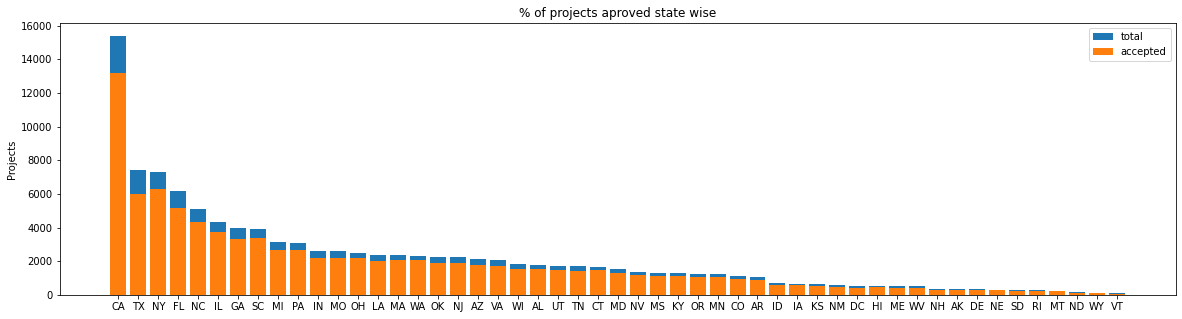

   school_state  project_is_approved  total       Avg
4            CA                13205  15388  0.858136
43           TX                 6014   7396  0.813142
34           NY                 6291   7318  0.859661
9            FL                 5144   6185  0.831690
27           NC                 4353   5091  0.855038
   school_state  project_is_approved  total       Avg
39           RI                  243    285  0.852632
26           MT                  200    245  0.816327
28           ND                  127    143  0.888112
50           WY                   82     98  0.836735
46           VT                   64     80  0.800000


In [12]:
univariate_barplots(project_data, 'school_state', 'project_is_approved', top=False)

__Every state is having more than 80% success rate in approval__

### 1.2.2 Univariate Analysis: teacher_prefix

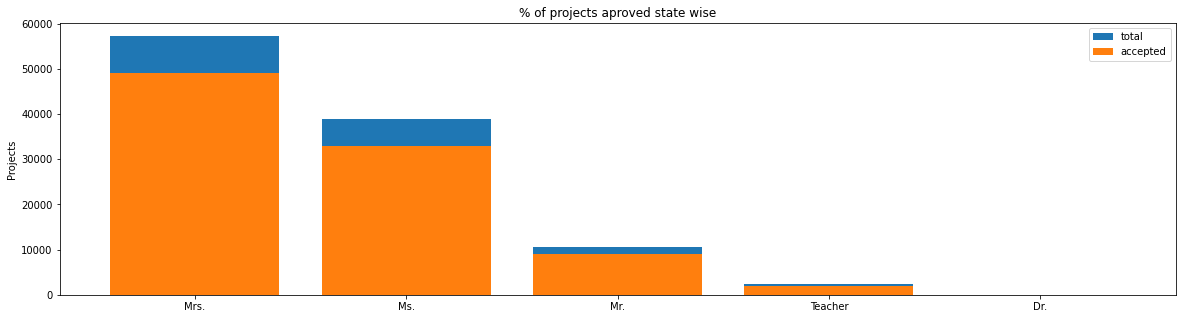

  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308
  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308


In [13]:
univariate_barplots(project_data, 'teacher_prefix', 'project_is_approved' , top=False)

### 1.2.3 Univariate Analysis: project_grade_category

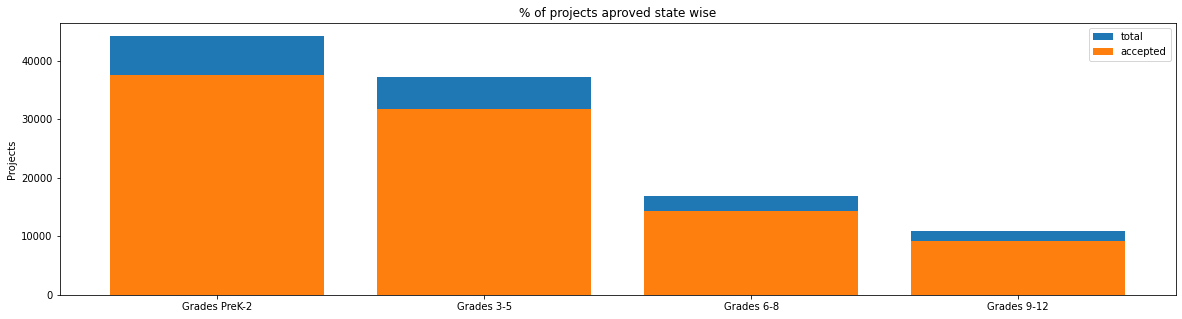

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636


In [14]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved', top=False)

### 1.2.4 Univariate Analysis: project_subject_categories

In [15]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [16]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

      project_subject_subcategories  \
0                     ESL, Literacy   
1  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories  
0             Literacy_Language  
1  History_Civics Health_Sports

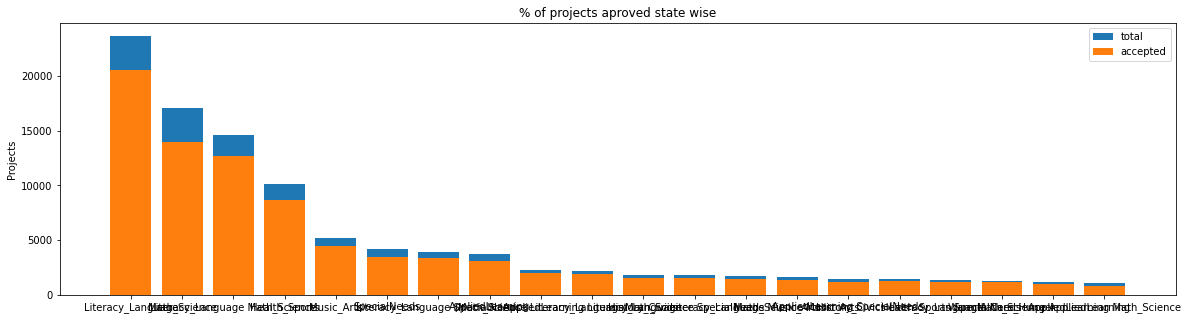

                  clean_categories  project_is_approved  total       Avg
24               Literacy_Language                20520  23655  0.867470
32                    Math_Science                13991  17072  0.819529
28  Literacy_Language Math_Science                12725  14636  0.869432
8                    Health_Sports                 8640  10177  0.848973
40                      Music_Arts                 4429   5180  0.855019
                    clean_categories  project_is_approved  total       Avg
19  History_Civics Literacy_Language                 1271   1421  0.894441
14        Health_Sports SpecialNeeds                 1215   1391  0.873472
50                Warmth Care_Hunger                 1212   1309  0.925898
33      Math_Science AppliedLearning                 1019   1220  0.835246
4       AppliedLearning Math_Science                  855   1052  0.812738


In [17]:
univariate_barplots(project_data, 'clean_categories', 'project_is_approved', top=20)

In [18]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

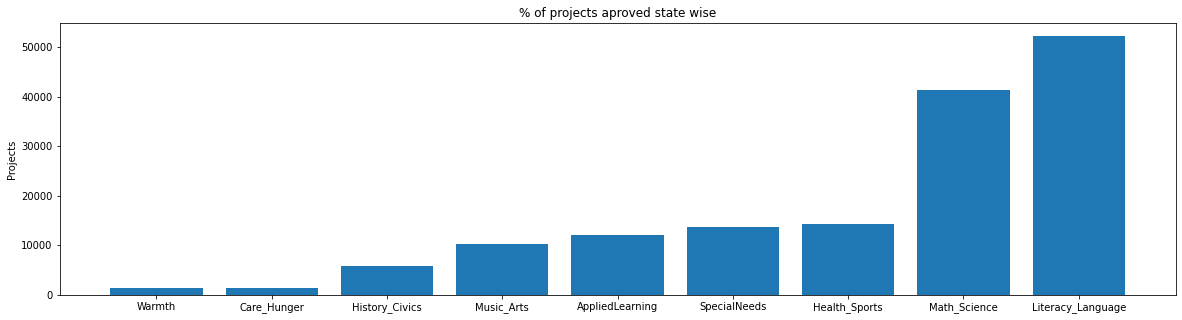

In [19]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()

In [20]:
for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Warmth               :      1388
Care_Hunger          :      1388
History_Civics       :      5914
Music_Arts           :     10293
AppliedLearning      :     12135
SpecialNeeds         :     13642
Health_Sports        :     14223
Math_Science         :     41421
Literacy_Language    :     52239


### 1.2.5 Univariate Analysis: project_subject_subcategories

In [21]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [22]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  
0             Literacy_Language                  ESL Literacy  
1  History_Civics Health_Sports  Civics_Government TeamSports

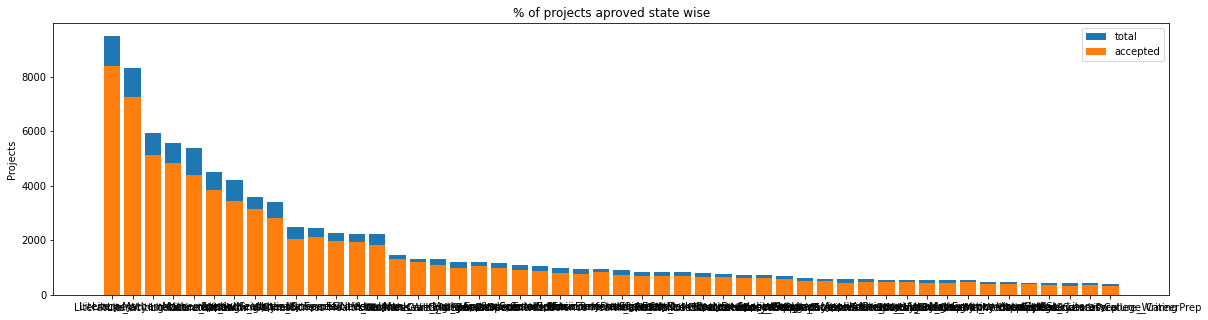

                clean_subcategories  project_is_approved  total       Avg
317                        Literacy                 8371   9486  0.882458
319            Literacy Mathematics                 7260   8325  0.872072
331  Literature_Writing Mathematics                 5140   5923  0.867803
318     Literacy Literature_Writing                 4823   5571  0.865733
342                     Mathematics                 4385   5379  0.815207
                    clean_subcategories  project_is_approved  total       Avg
196       EnvironmentalScience Literacy                  389    444  0.876126
127                                 ESL                  349    421  0.828979
79                   College_CareerPrep                  343    421  0.814727
17   AppliedSciences Literature_Writing                  361    420  0.859524
3    AppliedSciences College_CareerPrep                  330    405  0.814815


In [23]:
univariate_barplots(project_data, 'clean_subcategories', 'project_is_approved', top=50)

In [24]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

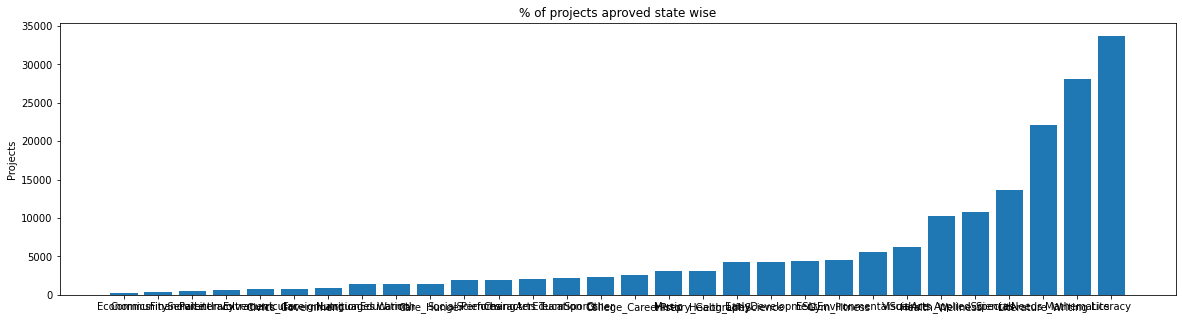

In [25]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()

In [26]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Economics            :       269
CommunityService     :       441
FinancialLiteracy    :       568
ParentInvolvement    :       677
Extracurricular      :       810
Civics_Government    :       815
ForeignLanguages     :       890
NutritionEducation   :      1355
Warmth               :      1388
Care_Hunger          :      1388
SocialSciences       :      1920
PerformingArts       :      1961
CharacterEducation   :      2065
TeamSports           :      2192
Other                :      2372
College_CareerPrep   :      2568
Music                :      3145
History_Geography    :      3171
Health_LifeScience   :      4235
EarlyDevelopment     :      4254
ESL                  :      4367
Gym_Fitness          :      4509
EnvironmentalScience :      5591
VisualArts           :      6278
Health_Wellness      :     10234
AppliedSciences      :     10816
SpecialNeeds         :     13642
Literature_Writing   :     22179
Mathematics          :     28074
Literacy             :     33700


### 1.2.6 Univariate Analysis: Text features (Title)

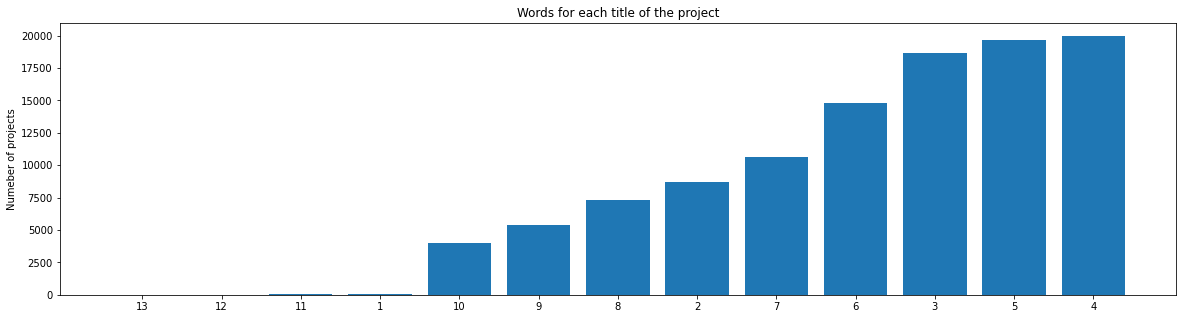

In [27]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [28]:
approved_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

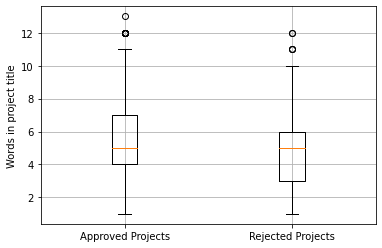

In [29]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

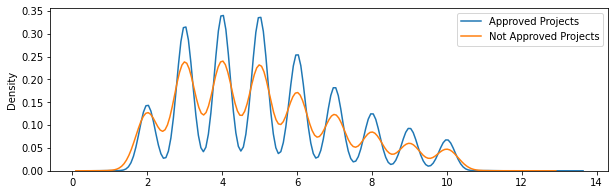

In [30]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.legend()
plt.show()

### 1.2.7 Univariate Analysis: Text features (Project Essay's)

In [31]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

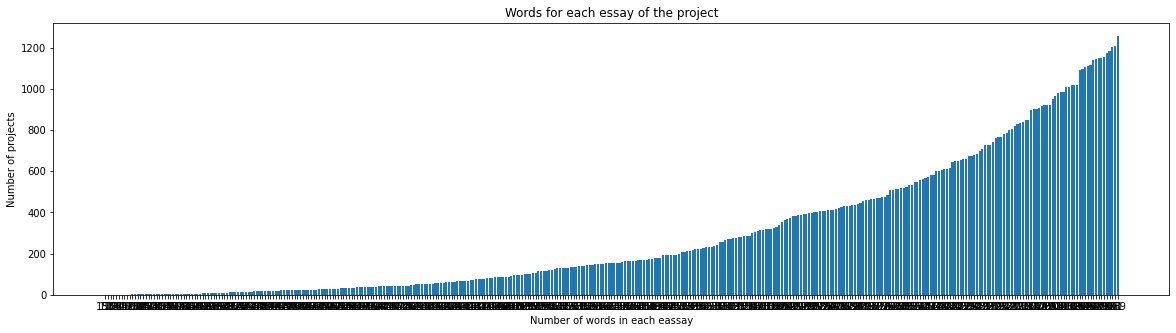

In [32]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['essay'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of projects')
plt.xlabel('Number of words in each eassay')
plt.title('Words for each essay of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

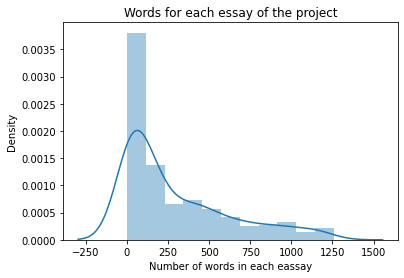

In [33]:
sns.distplot(word_count.values)
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.show()


In [34]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

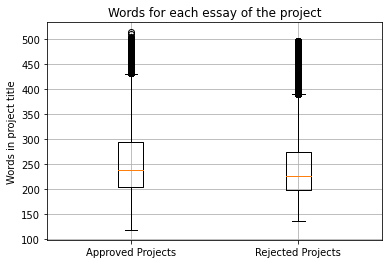

In [35]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

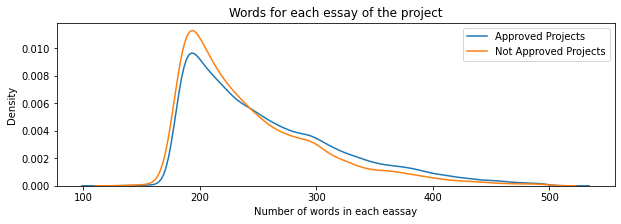

In [36]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

### 1.2.8 Univariate Analysis: Cost per project

In [37]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [38]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [39]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [40]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

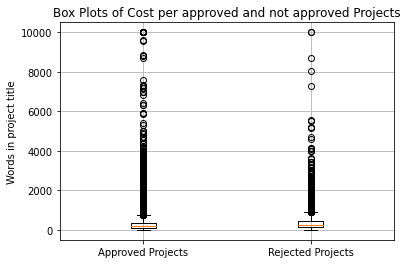

In [41]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

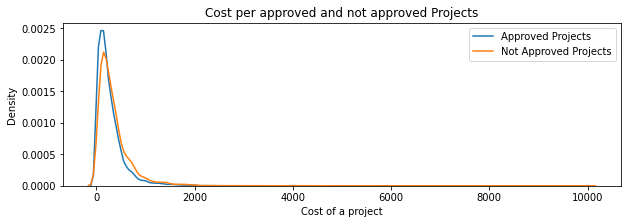

In [42]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

In [43]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.97         |
|     5      |       13.59       |          41.9         |
|     10     |       33.88       |         73.67         |
|     15     |        58.0       |         99.109        |
|     20     |       77.38       |         118.56        |
|     25     |       99.95       |        140.892        |
|     30     |       116.68      |         162.23        |
|     35     |      137.232      |        184.014        |
|     40     |       157.0       |        208.632        |
|     45     |      178.265      |        235.106        |
|     50     |       198.99      |        263.145        |
|     55     |       223.99      |         292.61        |
|     60     |       255.63      |        325.144        |
|     65     |      285.412      |         362.39       

# Now will be pre-processing the data

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

from nltk.corpus import stopwords
import pickle

from tqdm import tqdm
import os

## 1. Reading Data

In [152]:
project_data = pd.read_csv('../LARGE_Datasets/train.csv', nrows=5000)
resource_data = pd.read_csv('../LARGE_Datasets/resources.csv')

In [153]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (5000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [154]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

# 2. Preprocessing Categorical Features: project_grade_category

In [155]:
project_data['project_grade_category'].value_counts()

Grades PreK-2    2002
Grades 3-5       1729
Grades 6-8        785
Grades 9-12       484
Name: project_grade_category, dtype: int64

we need to remove the spaces, replace the '-' with '_' and convert all the letters to small

In [156]:
# https://stackoverflow.com/questions/36383821/pandas-dataframe-apply-function-to-column-strings-based-on-other-column-value
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(' ','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace('-','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.lower()
project_data['project_grade_category'].value_counts()

grades_prek_2    2002
grades_3_5       1729
grades_6_8        785
grades_9_12       484
Name: project_grade_category, dtype: int64

# 3. Preprocessing Categorical Features: project_subject_categories

In [157]:
project_data['project_subject_categories'].value_counts()

Literacy & Language                           1067
Math & Science                                 795
Literacy & Language, Math & Science            679
Health & Sports                                509
Music & The Arts                               233
Literacy & Language, Special Needs             207
Applied Learning                               164
Special Needs                                  162
Math & Science, Literacy & Language            101
Applied Learning, Literacy & Language           97
Applied Learning, Special Needs                 80
Math & Science, Special Needs                   80
Literacy & Language, Music & The Arts           79
Math & Science, Music & The Arts                76
History & Civics, Literacy & Language           65
History & Civics                                63
Health & Sports, Special Needs                  57
Warmth, Care & Hunger                           53
Math & Science, Applied Learning                52
Applied Learning, Math & Scienc

>remove spaces, 'the' <br>
replace '&' with '\_', and ',' with '_'

In [158]:
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(' The ','')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(' ','')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace('&','_')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(',','_')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.lower()
project_data['project_subject_categories'].value_counts()

literacy_language                       1067
math_science                             795
literacy_language_math_science           679
health_sports                            509
music_arts                               233
literacy_language_specialneeds           207
appliedlearning                          164
specialneeds                             162
math_science_literacy_language           101
appliedlearning_literacy_language         97
math_science_specialneeds                 80
appliedlearning_specialneeds              80
literacy_language_music_arts              79
math_science_music_arts                   76
history_civics_literacy_language          65
history_civics                            63
health_sports_specialneeds                57
warmth_care_hunger                        53
math_science_appliedlearning              52
appliedlearning_math_science              44
health_sports_literacy_language           40
literacy_language_history_civics          40
appliedlea

# 4. Preprocessing Categorical Features: teacher_prefix

In [159]:
project_data['teacher_prefix'].value_counts()

Mrs.       2560
Ms.        1845
Mr.         495
Teacher     100
Name: teacher_prefix, dtype: int64

In [160]:
# check if we have any nan values are there
print(project_data['teacher_prefix'].isnull().values.any())
print("number of nan values",project_data['teacher_prefix'].isnull().values.sum())

False
number of nan values 0


>numebr of missing values are very less in number, we can replace it with Mrs. as most of the projects are submitted by Mrs.

In [161]:
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna('Mrs.')

In [162]:
project_data['teacher_prefix'].value_counts()

Mrs.       2560
Ms.        1845
Mr.         495
Teacher     100
Name: teacher_prefix, dtype: int64

>Remove '.' <br>
>convert all the chars to small

In [163]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.replace('.','')
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.lower()
project_data['teacher_prefix'].value_counts()

mrs        2560
ms         1845
mr          495
teacher     100
Name: teacher_prefix, dtype: int64

# 5. Preprocessing Categorical Features: project_subject_subcategories

In [164]:
project_data['project_subject_subcategories'].value_counts()

Literacy                                    449
Literacy, Mathematics                       368
Literature & Writing, Mathematics           293
Literacy, Literature & Writing              234
Mathematics                                 232
                                           ... 
Foreign Languages, Health & Life Science      1
ESL, Environmental Science                    1
Gym & Fitness, Music                          1
Gym & Fitness, History & Geography            1
Community Service, Gym & Fitness              1
Name: project_subject_subcategories, Length: 248, dtype: int64

> same process we did in project_subject_categories

In [165]:
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(' The ','')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(' ','')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace('&','_')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(',','_')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.lower()
project_data['project_subject_subcategories'].value_counts()

literacy                               449
literacy_mathematics                   368
literature_writing_mathematics         293
literacy_literature_writing            234
mathematics                            232
                                      ... 
appliedsciences_foreignlanguages         1
earlydevelopment_teamsports              1
mathematics_performingarts               1
civics_government_extracurricular        1
earlydevelopment_health_lifescience      1
Name: project_subject_subcategories, Length: 248, dtype: int64

# 6. Preprocessing Categorical Features: school_state

In [166]:
project_data['school_state'].value_counts()

CA    707
TX    352
NY    342
FL    261
NC    246
SC    191
IL    184
GA    164
PA    151
MI    151
OH    122
OK    120
MO    117
MA    115
LA    114
IN    113
NJ     99
AZ     99
WA     97
VA     90
TN     85
AL     84
CT     78
UT     76
WI     72
MD     69
OR     64
KY     59
CO     58
NV     53
AR     52
MN     48
MS     46
KS     30
ID     29
IA     29
HI     28
DC     23
NM     22
WV     21
NE     19
ME     19
AK     17
SD     16
RI     16
NH     13
ND     11
DE     11
WY      9
MT      6
VT      2
Name: school_state, dtype: int64

>convert all of them into small letters

In [167]:
project_data['school_state'] = project_data['school_state'].str.lower()
project_data['school_state'].value_counts()

ca    707
tx    352
ny    342
fl    261
nc    246
sc    191
il    184
ga    164
pa    151
mi    151
oh    122
ok    120
mo    117
ma    115
la    114
in    113
az     99
nj     99
wa     97
va     90
tn     85
al     84
ct     78
ut     76
wi     72
md     69
or     64
ky     59
co     58
nv     53
ar     52
mn     48
ms     46
ks     30
id     29
ia     29
hi     28
dc     23
nm     22
wv     21
ne     19
me     19
ak     17
sd     16
ri     16
nh     13
de     11
nd     11
wy      9
mt      6
vt      2
Name: school_state, dtype: int64

# 7. Preprocessing Categorical Features: project_title

In [168]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [169]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [170]:
project_data['project_title'].head(5)

0     Educational Support for English Learners at Home
1                Wanted: Projector for Hungry Learners
2    Soccer Equipment for AWESOME Middle School Stu...
3                               Techie Kindergarteners
4                               Interactive Math Tools
Name: project_title, dtype: object

In [171]:
print("printing some random reviews")
print(9, project_data['project_title'].values[9])
print(34, project_data['project_title'].values[34])
print(147, project_data['project_title'].values[147])

printing some random reviews
9 Just For the Love of Reading--\r\nPure Pleasure
34 \"Have A Ball!!!\"
147 Who needs a Chromebook?\r\nWE DO!!


In [172]:
# Combining all the above stundents 
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [173]:
preprocessed_titles = preprocess_text(project_data['project_title'].values)

100%|██████████| 5000/5000 [00:00<00:00, 58929.62it/s]


In [174]:
print("printing some random reviews")
print(9, preprocessed_titles[9])
print(34, preprocessed_titles[34])
print(147, preprocessed_titles[147])

printing some random reviews
9 love reading pure pleasure
34 ball
147 needs chromebook


# 8. Preprocessing Categorical Features: essay

In [175]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [176]:
print("printing some random essay")
print(9, project_data['essay'].values[9])
print('-'*50)
print(34, project_data['essay'].values[34])
print('-'*50)
print(147, project_data['essay'].values[147])

printing some random essay
9 Over 95% of my students are on free or reduced lunch.  I have a few who are homeless, but despite that, they come to school with an eagerness to learn.  My students are inquisitive eager learners who  embrace the challenge of not having great books and other resources  every day.  Many of them are not afforded the opportunity to engage with these big colorful pages of a book on a regular basis at home and they don't travel to the public library.  \r\nIt is my duty as a teacher to do all I can to provide each student an opportunity to succeed in every aspect of life. \r\nReading is Fundamental! My students will read these books over and over again while boosting their comprehension skills. These books will be used for read alouds, partner reading and for Independent reading. \r\nThey will engage in reading to build their \"Love for Reading\" by reading for pure enjoyment. They will be introduced to some new authors as well as some old favorites. I want my st

In [177]:
preprocessed_essays = preprocess_text(project_data['essay'].values)

100%|██████████| 5000/5000 [00:02<00:00, 2407.71it/s]


In [178]:
print("printing some random essay")
print(9, preprocessed_essays[9])
print('-'*50)
print(34, preprocessed_essays[34])
print('-'*50)
print(147, preprocessed_essays[147])

printing some random essay
9 95 students free reduced lunch homeless despite come school eagerness learn students inquisitive eager learners embrace challenge not great books resources every day many not afforded opportunity engage big colorful pages book regular basis home not travel public library duty teacher provide student opportunity succeed every aspect life reading fundamental students read books boosting comprehension skills books used read alouds partner reading independent reading engage reading build love reading reading pure enjoyment introduced new authors well old favorites want students ready 21st century know pleasure holding good hard back book hand nothing like good book read students soar reading consideration generous funding contribution help build stamina prepare 3rd grade thank much reading proposal nannan
--------------------------------------------------
34 students mainly come extremely low income families majority come homes parents work full time students s

# 8. Preprocessing Numerical Values: price

In [179]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [180]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [181]:
project_data['price'].head()

0    154.60
1    299.00
2    516.85
3    232.90
4     67.98
Name: price, dtype: float64

## 8.1 applying StandardScaler

In [182]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(project_data['price'].values.reshape(-1, 1))
project_data['std_price']=scaler.transform(project_data['price'].values.reshape(-1, 1) )

In [183]:
project_data['std_price'].head()

0   -0.393708
1   -0.010053
2    0.568751
3   -0.185673
4   -0.623847
Name: std_price, dtype: float64

## 8.2 applying MinMaxScaler

In [184]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(project_data['price'].values.reshape(-1, 1))
project_data['nrm_price']=scaler.transform(project_data['price'].values.reshape(-1, 1))

In [185]:
project_data['nrm_price'].head()

0    0.015320
1    0.029763
2    0.051554
3    0.023152
4    0.006656
Name: nrm_price, dtype: float64

In [186]:
project_data.head()

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc            mrs   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a             mr   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0             ms   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60            mrs   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec            mrs   

  school_state project_submitted_datetime project_grade_category  \
0           in        2016-12-05 13:43:57          grades_prek_2   
1           fl        2016-10-25 09:22:10             grades_6_8   
2           az        2016-08-31 12:03:56             grades_6_8   
3           ky        2016-10-06 21:16:17          grades_prek_2   
4           tx        2016-07-11 01:10:09          grades_prek_2   

       project_subject_categories project_subject_subcategories  \
0               literacy_language                  esl_literacy   
1    history_civics_health_sports  civics_government_teamsports   
2                   health_sports    health_wellness_teamsports   
3  literacy_language_math_science          literacy_mathematics   
4                    math_science                   mathematics   

                                       project_title  ... project_essay_3  \
0   Educational Support for English Learners at Home  ...             NaN   
1              Wanted: Projector for Hungry Learners  ...             NaN   
2  Soccer Equipment for AWESOME Middle School Stu...  ...             NaN   
3                             Techie Kindergarteners  ...             NaN   
4                             Interactive Math Tools  ...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

  teacher_number_of_previously_posted_projects project_is_approved  \
0                                            0                   0   
1                                            7                   1   
2                                            1                   0   
3                                            4                   1   
4                                            1                   1   

                                               essay   price quantity  \
0  My students are English learners that are work...  154.60       23   
1  Our students arrive to our school eager to lea...  299.00        1   
2  \r\n\"True champions aren't always the ones th...  516.85       22   
3  I work at a unique school filled with both ESL...  232.90        4   
4  Our second grade classroom next year will be m...   67.98        4   

   std_price  nrm_price  
0  -0.393708   0.015320  
1  -0.010053   0.029763  
2   0.568751   0.051554  
3  -0.185673   0.023152  
4  -0.623847   0.006656  

[5 rows x 22 columns]

In [187]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid    = SentimentIntensityAnalyzer()

negative_sentiments = []
positive_sentiments = []
neutral_sentiments = []
compound_sentiments = []

for i in tqdm(project_data['essay']):
  sid_sentiments = sid.polarity_scores(i)
  negative_sentiments.append(sid_sentiments['neg'])
  positive_sentiments.append(sid_sentiments['pos'])
  neutral_sentiments.append(sid_sentiments['neu'])
  compound_sentiments.append(sid_sentiments['compound'])
  
# Now append these sentiments columns/freatures to original preprocessed dataframe
project_data['negative_sent'] = negative_sentiments
project_data['positive_sent'] = positive_sentiments
project_data['neutral_sent'] = neutral_sentiments
project_data['compound_sent'] = compound_sentiments

project_data.head(1)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/paul/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
100%|██████████| 5000/5000 [00:10<00:00, 497.45it/s]


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc            mrs   

  school_state project_submitted_datetime project_grade_category  \
0           in        2016-12-05 13:43:57          grades_prek_2   

  project_subject_categories project_subject_subcategories  \
0          literacy_language                  esl_literacy   

                                      project_title  ... project_is_approved  \
0  Educational Support for English Learners at Home  ...                   0   

                                               essay  price quantity  \
0  My students are English learners that are work...  154.6       23   

  std_price  nrm_price  negative_sent positive_sent  neutral_sent  \
0 -0.393708    0.01532          0.008         0.081         0.911   

   compound_sent  
0         0.9611  

[1 rows x 26 columns]

In [188]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'essay', 'price', 'quantity', 'std_price', 'nrm_price', 'negative_sent',
       'positive_sent', 'neutral_sent', 'compound_sent'],
      dtype='object')

In [189]:
project_data.to_csv("./preprocessed.csv")

<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

# <font color='red'> <b>Featurization - 1</b></font>

<ol>
    <li><strong>Applying Decision Tree Classifier(DecisionTreeClassifier) on the below feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum value</li>
    <li>Finding the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)</li>
        </ul>
    </li>
    <li>

<h1>1. Decision Tree </h1>

## 1.1 Loading Data

<font color='blue'><b>Hint for calculating Sentiment scores</b></font>

In [190]:
# !pip install wordcloud
# from google.colab import drive
# drive.mount('/content/gdrive')
# root_path = '/content/gdrive/MyDrive/AML-Assignments/A-9/preprocessed_data.csv'
# glove_vector_path = '/content/gdrive/MyDrive/AML-Assignments/A-9/glove_vectors'
# root_path = '../LARGE_Datasets/preprocessed_data.csv'
glove_vector_path = '../LARGE_Datasets/glove_vectors'

import pandas as pd
import numpy as np

from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import GridSearchCV
from prettytable import PrettyTable
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

from scipy.sparse import hstack
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
sns.set()

import pickle
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon

org_preprocessed = project_data


org_preprocessed.head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/paul/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc            mrs   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a             mr   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0             ms   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60            mrs   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec            mrs   

  school_state project_submitted_datetime project_grade_category  \
0           in        2016-12-05 13:43:57          grades_prek_2   
1           fl        2016-10-25 09:22:10             grades_6_8   
2           az        2016-08-31 12:03:56             grades_6_8   
3           ky        2016-10-06 21:16:17          grades_prek_2   
4           tx        2016-07-11 01:10:09          grades_prek_2   

       project_subject_categories project_subject_subcategories  \
0               literacy_language                  esl_literacy   
1    history_civics_health_sports  civics_government_teamsports   
2                   health_sports    health_wellness_teamsports   
3  literacy_language_math_science          literacy_mathematics   
4                    math_science                   mathematics   

                                       project_title  ... project_is_approved  \
0   Educational Support for English Learners at Home  ...                   0   
1              Wanted: Projector for Hungry Learners  ...                   1   
2  Soccer Equipment for AWESOME Middle School Stu...  ...                   0   
3                             Techie Kindergarteners  ...                   1   
4                             Interactive Math Tools  ...                   1   

                                               essay   price quantity  \
0  My students are English learners that are work...  154.60       23   
1  Our students arrive to our school eager to lea...  299.00        1   
2  \r\n\"True champions aren't always the ones th...  516.85       22   
3  I work at a unique school filled with both ESL...  232.90        4   
4  Our second grade classroom next year will be m...   67.98        4   

  std_price  nrm_price  negative_sent positive_sent  neutral_sent  \
0 -0.393708   0.015320          0.008         0.081         0.911   
1 -0.010053   0.029763          0.037         0.118         0.845   
2  0.568751   0.051554          0.058         0.184         0.759   
3 -0.185673   0.023152          0.052         0.214         0.733   
4 -0.623847   0.006656          0.016         0.087         0.897   

   compound_sent  
0         0.9611  
1         0.9447  
2         0.9956  
3         0.9931  
4         0.9192  

[5 rows x 26 columns]

In [191]:
org_preprocessed.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'essay', 'price', 'quantity', 'std_price', 'nrm_price', 'negative_sent',
       'positive_sent', 'neutral_sent', 'compound_sent'],
      dtype='object')

In [192]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

## Sentiment Analysis and adding positive/neg/neutral/compound to the data matrix

In [193]:
# Sentiment Analysis on 'essay'
sid    = SentimentIntensityAnalyzer()

negative_sentiments = []
positive_sentiments = []
neutral_sentiments = []
compound_sentiments = []

for i in tqdm(org_preprocessed['essay']):
  sid_sentiments = sid.polarity_scores(i)
  negative_sentiments.append(sid_sentiments['neg'])
  positive_sentiments.append(sid_sentiments['pos'])
  neutral_sentiments.append(sid_sentiments['neu'])
  compound_sentiments.append(sid_sentiments['compound'])
  
  
org_preprocessed['negative_sent'] = negative_sentiments
org_preprocessed['positive_sent'] = positive_sentiments
org_preprocessed['neutral_sent'] = neutral_sentiments
org_preprocessed['compound_sent'] = compound_sentiments

# print(org_preprocessed.head())

100%|██████████| 5000/5000 [00:08<00:00, 573.51it/s]


In [194]:
Y = org_preprocessed['project_is_approved'].values
X = org_preprocessed.drop(['project_is_approved'], axis=1)
print(Y.shape)
print(X.shape)

(5000,)
(5000, 25)


## Splitting the whole dataset into train and test

Important Note - Whenever you want to perform simple cross-validation, split the dataset into the train, CV and the test sets. If you want to perform K-fold CV(using 'for' loops) or GridSearch cross-validation or RandomSearch cross-validation, just split the dataset into the train and the test sets. The CV set gets created internally during the cross-validation. Even if you create a separate CV set while splitting the whole dataset, it goes waste without any usage.

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3500, 25) (3500,)
(1500, 25) (1500,)


# Set-1: categorical, numerical features +  essay (TFIDF) + Sentiment scores(preprocessed_essay)

## Bag of Words for the "essay" column


In [196]:
# As required for Task-1, applying TFIDF on the Essay column
vectorizer_essay_tfidf = TfidfVectorizer(min_df=10)

# Apply .fit() on this vectorizer on Train data
# Note .fit() is applied only on the train data, as test and cv should not be fitted
vectorizer_essay_tfidf.fit(X_train['essay'].values)

# Now use the fitted TfidfVectorizer for converting 'essay' text to Vector form
X_train_vectorized_tfidf_essay = vectorizer_essay_tfidf.transform(X_train['essay'].values)
X_test_vectorized_tfidf_essay = vectorizer_essay_tfidf.transform(X_test['essay'].values)

print('After TFIDF on Essay column checking the shapes ')
print(X_train_vectorized_tfidf_essay.shape, y_train.shape)
print(X_test_vectorized_tfidf_essay.shape, y_test.shape)

After TFIDF on Essay column checking the shapes 
(3500, 3742) (3500,)
(1500, 3742) (1500,)


In [197]:
count_vectorizer_school_state = CountVectorizer()
count_vectorizer_school_state.fit(X_train['school_state'].values)

# Now use the fitted CountVectorizer for converting 'school_state' text to Vector form
X_train_vectorized_ohe_school_state = count_vectorizer_school_state.transform(X_train['school_state'].values)
X_test_vectorized_ohe_school_state = count_vectorizer_school_state.transform(X_test['school_state'].values)

school_state_features = count_vectorizer_school_state.get_feature_names()
print('school_state_features ', school_state_features)


print('After CountVectorizing on school_state column checking the shapes ')
print(X_train_vectorized_ohe_school_state.shape, y_train.shape)
print(X_test_vectorized_ohe_school_state.shape, y_test.shape)


school_state_features  ['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'wa', 'wi', 'wv', 'wy']
After CountVectorizing on school_state column checking the shapes 
(3500, 50) (3500,)
(1500, 50) (1500,)


In [198]:
count_vectorizer_teacher_prefix = CountVectorizer()
count_vectorizer_teacher_prefix.fit(X_train['teacher_prefix'].values)

# Now use the fitted CountVectorizer for converting 'teacher_prefix' text to Vector form
X_train_vectorized_ohe_teacher_prefix = count_vectorizer_teacher_prefix.transform(X_train['teacher_prefix'].values)
X_test_vectorized_ohe_teacher_prefix = count_vectorizer_teacher_prefix.transform(X_test['teacher_prefix'].values)

teacher_prefix_features = count_vectorizer_teacher_prefix.get_feature_names()
print('teacher_prefix_features ', teacher_prefix_features)


print('After CountVectorizing on teacher_prefix column checking the shapes ')
print(X_train_vectorized_ohe_teacher_prefix.shape, y_train.shape)
print(X_test_vectorized_ohe_teacher_prefix.shape, y_test.shape)

teacher_prefix_features  ['mr', 'mrs', 'ms', 'teacher']
After CountVectorizing on teacher_prefix column checking the shapes 
(3500, 4) (3500,)
(1500, 4) (1500,)


In [199]:
count_vectorizer_project_grade_category = CountVectorizer()
count_vectorizer_project_grade_category.fit(X_train['project_grade_category'].values)

# Now use the fitted CountVectorizer for converting 'project_grade_category' text to Vector form
X_train_vectorized_ohe_project_grade_category = count_vectorizer_project_grade_category.transform(X_train['project_grade_category'].values)
X_test_vectorized_ohe_project_grade_category = count_vectorizer_project_grade_category.transform(X_test['project_grade_category'].values)

project_grade_category_features = count_vectorizer_project_grade_category.get_feature_names()
print('project_grade_category_features ', project_grade_category_features)


print('After CountVectorizing on project_grade_category column checking the shapes ')
print(X_train_vectorized_ohe_project_grade_category.shape, y_train.shape)
print(X_test_vectorized_ohe_project_grade_category.shape, y_test.shape)

project_grade_category_features  ['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
After CountVectorizing on project_grade_category column checking the shapes 
(3500, 4) (3500,)
(1500, 4) (1500,)


In [200]:
count_vectorizer_project_subject_categories = CountVectorizer()
count_vectorizer_project_subject_categories.fit(X_train['project_subject_categories'].values)

# Now use the fitted CountVectorizer for converting 'project_subject_categories' text to Vector form
X_train_vectorized_ohe_project_subject_categories = count_vectorizer_project_subject_categories.transform(X_train['project_subject_categories'].values)
X_test_vectorized_ohe_project_subject_categories = count_vectorizer_project_subject_categories.transform(X_test['project_subject_categories'].values)

project_subject_categories_features = count_vectorizer_project_subject_categories.get_feature_names()
print('project_subject_categories_features ', project_subject_categories_features)


print('After CountVectorizing on project_subject_categories column checking the shapes ')
print(X_train_vectorized_ohe_project_subject_categories.shape, y_train.shape)
print(X_test_vectorized_ohe_project_subject_categories.shape, y_test.shape)

project_subject_categories_features  ['appliedlearning', 'appliedlearning_health_sports', 'appliedlearning_history_civics', 'appliedlearning_literacy_language', 'appliedlearning_math_science', 'appliedlearning_music_arts', 'appliedlearning_specialneeds', 'health_sports', 'health_sports_appliedlearning', 'health_sports_history_civics', 'health_sports_literacy_language', 'health_sports_math_science', 'health_sports_music_arts', 'health_sports_specialneeds', 'health_sports_warmth_care_hunger', 'history_civics', 'history_civics_appliedlearning', 'history_civics_health_sports', 'history_civics_literacy_language', 'history_civics_math_science', 'history_civics_music_arts', 'history_civics_specialneeds', 'literacy_language', 'literacy_language_appliedlearning', 'literacy_language_history_civics', 'literacy_language_math_science', 'literacy_language_music_arts', 'literacy_language_specialneeds', 'literacy_language_warmth_care_hunger', 'math_science', 'math_science_appliedlearning', 'math_scien

In [201]:
X_train.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'essay', 'price',
       'quantity', 'std_price', 'nrm_price', 'negative_sent', 'positive_sent',
       'neutral_sent', 'compound_sent'],
      dtype='object')

In [202]:
count_vectorizer_project_subject_subcategories = CountVectorizer()
count_vectorizer_project_subject_subcategories.fit(X_train['project_subject_subcategories'].values)

# Now use the fitted CountVectorizer for converting 'project_subject_subcategories' text to Vector form
X_train_vectorized_ohe_project_subject_subcategories = count_vectorizer_project_subject_subcategories.transform(X_train['project_subject_subcategories'].values)
X_test_vectorized_ohe_project_subject_subcategories = count_vectorizer_project_subject_subcategories.transform(X_test['project_subject_subcategories'].values)

project_subject_subcategories_features = count_vectorizer_project_subject_subcategories.get_feature_names()
# print('project_subject_subcategories_features ', project_subject_subcategories_features)


print('After CountVectorizing on project_subject_subcategories column checking the shapes ')
print(X_train_vectorized_ohe_project_subject_subcategories.shape, y_train.shape)
print(X_test_vectorized_ohe_project_subject_subcategories.shape, y_test.shape)

After CountVectorizing on project_subject_subcategories column checking the shapes 
(3500, 221) (3500,)
(1500, 221) (1500,)


### Vectorizing Price Column after Normalization

If I do the Normalization without reshaping first 

`normalizer.fit(X_train['price'].values)`

Then will get below error

```
ValueError: Expected 2D array, got 1D array instead:
array=[ 388.99  151.15  944.92   17.74    6.81  479.94  147.02   75.19   64.89
  565.   1418.08   13.99  184.95  393.83  379.98  193.53  278.88  351.54
  145.99  299.99  149.97  529.95  628.42  279.98].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
```

In [203]:
normalizer = Normalizer()

normalizer.fit(X_train['price'].values.reshape(-1, 1))

X_train_normalized_price = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_test_normalized_price = normalizer.transform(X_test['price'].values.reshape(-1,1))

print('After Normalizing on price column checking the shapes ')
print(X_train_normalized_price.shape, y_train.shape)
print(X_test_normalized_price.shape, y_test.shape)


After Normalizing on price column checking the shapes 
(3500, 1) (3500,)
(1500, 1) (1500,)


### Now will Standardize and then .fit() and .transform() all the Sentiments related Columns

In [204]:
sentiments_standardizer = StandardScaler()

# First applying the .fit() on the train data to find Mean and SD
sentiments_standardizer.fit(X_train['negative_sent'].values.reshape(-1,1))

# Now applying .transform() to train, test and cv data
X_train_negative_sent_standardized = sentiments_standardizer.transform(X_train['negative_sent'].values.reshape(-1,1))
X_test_negative_sent_standardized = sentiments_standardizer.transform(X_test['negative_sent'].values.reshape(-1,1))

print('After Standardizing on negative_sent column checking the shapes ')
print(X_train_negative_sent_standardized.shape, y_train.shape)
print(X_test_negative_sent_standardized.shape, y_test.shape)

After Standardizing on negative_sent column checking the shapes 
(3500, 1) (3500,)
(1500, 1) (1500,)


In [205]:
# First applying the .fit() on the train data to find Mean and SD
sentiments_standardizer.fit(X_train['positive_sent'].values.reshape(-1,1))

# Now applying .transform() to train, test and cv data
X_train_positive_sent_standardized = sentiments_standardizer.transform(X_train['positive_sent'].values.reshape(-1,1))
X_test_positive_sent_standardized = sentiments_standardizer.transform(X_test['positive_sent'].values.reshape(-1,1))

print('After Standardizing on positive_sent column checking the shapes ')
print(X_train_positive_sent_standardized.shape, y_train.shape)
print(X_test_positive_sent_standardized.shape, y_test.shape)

After Standardizing on positive_sent column checking the shapes 
(3500, 1) (3500,)
(1500, 1) (1500,)


In [206]:
# First applying the .fit() on the train data to find Mean and SD
sentiments_standardizer.fit(X_train['neutral_sent'].values.reshape(-1,1))

# Now applying .transform() to train, test and cv data
X_train_neutral_sent_standardized = sentiments_standardizer.transform(X_train['neutral_sent'].values.reshape(-1,1))
X_test_neutral_sent_standardized = sentiments_standardizer.transform(X_test['neutral_sent'].values.reshape(-1,1))

print('After Standardizing on neutral_sent column checking the shapes ')
print(X_train_neutral_sent_standardized.shape, y_train.shape)
print(X_test_neutral_sent_standardized.shape, y_test.shape)

After Standardizing on neutral_sent column checking the shapes 
(3500, 1) (3500,)
(1500, 1) (1500,)


In [207]:
# First applying the .fit() on the train data to find Mean and SD
sentiments_standardizer.fit(X_train['compound_sent'].values.reshape(-1,1))

# Now applying .transform() to train, test and cv data
X_train_compound_sent_standardized = sentiments_standardizer.transform(X_train['compound_sent'].values.reshape(-1,1))
X_test_compound_sent_standardized = sentiments_standardizer.transform(X_test['compound_sent'].values.reshape(-1,1))

print('After Standardizing on compound_sent column checking the shapes ')
print(X_train_compound_sent_standardized.shape, y_train.shape)
print(X_test_compound_sent_standardized.shape, y_test.shape)

After Standardizing on compound_sent column checking the shapes 
(3500, 1) (3500,)
(1500, 1) (1500,)


# 5. Set S1 - Merging (with hstack) all the above vectorized features that we created above  

First a note on merging tith hstack from https://www.w3resource.com/numpy/manipulation/hstack.php

#### After vectorizing for all non-sparse features (like price, sentiments), I will get arrays of the form - [[3], [5], [7]]

```py

import numpy as np

x = np.array([[3], [5], [7]])
y = np.array([[5], [7], [9]])
np.hstack((x,y))

>>> array([[3, 5],
           [5, 7],
           [7, 9]])

```

![Imgur](https://imgur.com/ypYNtUk.png)

#### And similarly `scipy.sparse.hstack` concatenates the sparse tf-idf matrices (with the same number of rows) returned by TfidfVectorizer.fit_transform.

---

#### You can use the scipy.sparse.hstack to concatenate sparse matrices with the same number of rows (horizontal concatenation):

`hstack((X1, X2))`

### We need to merge all the numerical vectors i.e catogorical, text, once for Set S1 and then for S2 later

In [208]:
X_train_s1_merged = hstack((X_train_vectorized_tfidf_essay, X_train_vectorized_ohe_school_state, X_train_vectorized_ohe_teacher_prefix, X_train_vectorized_ohe_project_grade_category, X_train_vectorized_ohe_project_subject_categories, X_train_vectorized_ohe_project_subject_subcategories, X_train_normalized_price, X_train_negative_sent_standardized, X_train_positive_sent_standardized, X_train_neutral_sent_standardized, X_train_compound_sent_standardized ))

X_test_s1_merged = hstack((X_test_vectorized_tfidf_essay, X_test_vectorized_ohe_school_state, X_test_vectorized_ohe_teacher_prefix, X_test_vectorized_ohe_project_grade_category, X_test_vectorized_ohe_project_subject_categories, X_test_vectorized_ohe_project_subject_subcategories , X_test_normalized_price, X_test_negative_sent_standardized, X_test_positive_sent_standardized, X_test_neutral_sent_standardized, X_test_compound_sent_standardized ))

In [209]:
# Shape of the data-matrix after mergeing as above
print('Shape of X_train_s1_merged ', X_train_s1_merged.shape, 'Shpae of y_train ', y_train.shape)
print('Shape of X_test_s1_merged ', X_test_s1_merged.shape, 'Shpae of y_test ', y_test.shape)

Shape of X_train_s1_merged  (3500, 4070) Shpae of y_train  (3500,)
Shape of X_test_s1_merged  (1500, 4070) Shpae of y_test  (1500,)


### The hyper paramter tuning with GridSearchCV

best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500]

To find the best hyper parameter which will give the maximum AUC

In [210]:
depth_dt_gridsearch = [1, 5, 10, 50]
split_dt_gridsearch = [5, 10, 100, 500]

parameters_dict = { 'max_depth': depth_dt_gridsearch, 'min_samples_split': split_dt_gridsearch }

decision_tree = DecisionTreeClassifier(class_weight='balanced')

grid_search = GridSearchCV(decision_tree, parameters_dict, cv=3, scoring='roc_auc', return_train_score=True)
grid_search.fit(X_train_s1_merged, y_train)

print('Best Params from GridSearchCV ', grid_search.best_params_)

Best Params from GridSearchCV  {'max_depth': 10, 'min_samples_split': 500}


## Heatmap - Plot the performance of model both on train data and cross validation data for each hyper parameter, with rows as min_sample_split, columns as max_depth, and values inside the cell representing AUC Score

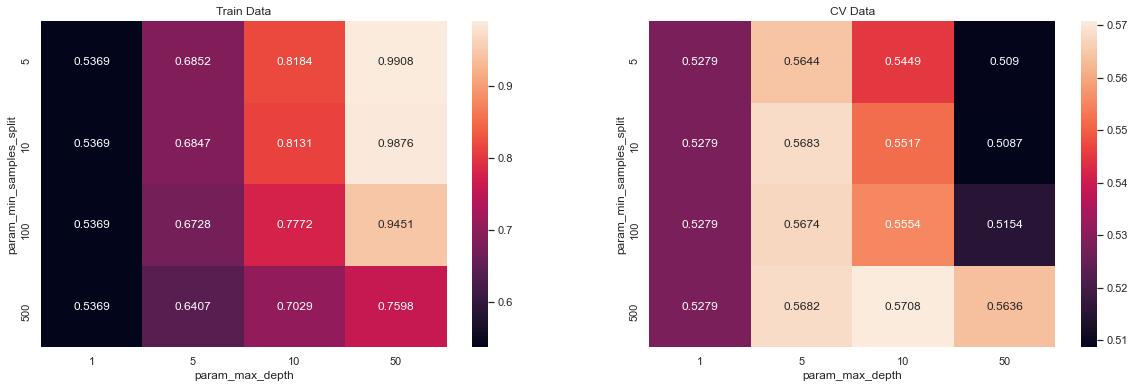

In [211]:
results_from_gridsearchcv = pd.DataFrame(grid_search.cv_results_)

max_auc_scores = results_from_gridsearchcv.groupby(['param_min_samples_split', 'param_max_depth']).max()

max_auc_scores = max_auc_scores.unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1, 2, figsize=(20, 6))

sns.heatmap(max_auc_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_auc_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Data')
ax[1].set_title('CV Data')
plt.show()


### A basic observtion on the above Heatmap

- For training dataset the best score is coming max_depth = 50 and min_samples_split = 500
- For validation dataset the best score is coming max_depth = 10 and min_samples_split = 500

## ROC curve - After finding the best hyper parameter, training our model with it, and finding the AUC on test data and plot the ROC curve on both train and test.


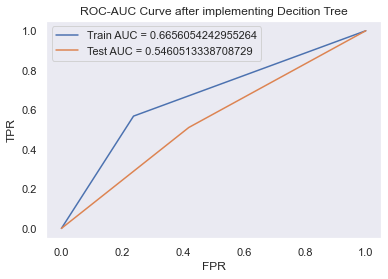

In [212]:
dt_clf = DecisionTreeClassifier(max_depth=10, min_samples_split=500, class_weight='balanced')
dt_clf.fit(X_train_s1_merged, y_train )

y_train_predicted = dt_clf.predict(X_train_s1_merged)
y_test_predicted = dt_clf.predict(X_test_s1_merged)

s1_train_fpr, s1_train_tpr, s1_train_threshold = roc_curve(y_train, y_train_predicted)
s1_test_fpr, s1_test_tpr, s1_test_threshold = roc_curve(y_test, y_test_predicted)

plt.plot(s1_train_fpr, s1_train_tpr, label="Train AUC = "+str(auc(s1_train_fpr, s1_train_tpr)))
plt.plot(s1_test_fpr, s1_test_tpr, label="Test AUC = "+str(auc(s1_test_fpr, s1_test_tpr)))
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.title('ROC-AUC Curve after implementing Decition Tree')
plt.show()

## Confusion matrix with predicted and original labels of test data points

confusion_matrix_s1_train  [[ 409  127]
 [1280 1684]]


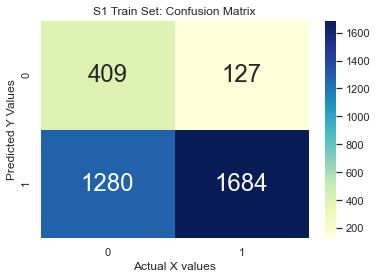

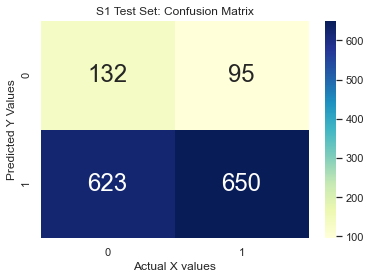

In [213]:
# First the Function to get the Predicted Y_vector based on a given threshold and fpr & tpr
# This will be needed for Calculating Confusion Matrix

def calculate_y_vector_from_threshold(proba, threshold, fpr, tpr):
  
    # Using argmax to return the position of the largest value.
    # based on the calculated value of tpr*(1-fpr)
    # tpr * (1-fpr) i.e. optimal_threshold is maximum when fpr is very low and tpr is very high
    optimal_threshold = threshold[np.argmax(tpr * (1-fpr))]  

  
    predicted_y_vector = []
    for i in proba:
        if i >= optimal_threshold:
            predicted_y_vector.append(1)
        else:
            predicted_y_vector.append(0)

    return predicted_y_vector

confusion_matrix_s1_train = confusion_matrix(y_train, calculate_y_vector_from_threshold(y_train_predicted, s1_train_threshold, s1_train_fpr, s1_train_tpr ) )

confusion_matrix_s1_test = confusion_matrix(y_test, calculate_y_vector_from_threshold(y_test_predicted, s1_test_threshold, s1_test_fpr, s1_test_tpr ) )

print('confusion_matrix_s1_train ', confusion_matrix_s1_train)
# Heatmap for Confusion Matrix: Train and SET 1
heatmap_confusion_matrix_train_s1 = sns.heatmap(confusion_matrix_s1_train, annot=True, fmt='d', cmap="YlGnBu", annot_kws={"size": 24})

plt.title('S1 Train Set: Confusion Matrix')
plt.xlabel('Actual X values')
plt.ylabel('Predicted Y Values')
plt.show()

heatmap_confusion_matrix_test_s1 = sns.heatmap(confusion_matrix_s1_test, annot=True, fmt='d', cmap="YlGnBu", annot_kws={"size": 24})

plt.title('S1 Test Set: Confusion Matrix')
plt.xlabel('Actual X values')
plt.ylabel('Predicted Y Values')
plt.show()

## Word-Cloud with all the `false positive data points`

- Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`

- Plot the box plot with the `price` of these `false positive data points`

- Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`

In [214]:
# Function to get the indices of the false-positive predictions
# This indices array will later be used to extract the text and price
# of only those rows whose predictions are found to be false-positive
def get_false_positive_indices_from_arr(y_actual, y_predicted):  
  if_false_positives_list =  (y_actual == 0 ) & (y_predicted == 1 )
  # "if_false_positives_list" is a list-of-booleans like so 
  # [True, False, True, False, ...., True]    
  # Below will return me the y_actual values satisfying the above condtion 
  # i.e. ONLY those elements where if_false_positives_list has a True value
  y_values_of_false_positives = y_actual[if_false_positives_list]
  indices_of_false_positives = np.in1d(y_actual, y_values_of_false_positives).nonzero()[0]
  return indices_of_false_positives

# In above I am filtering-a-list-based-on-a-list-of-booleans
# https://stackoverflow.com/a/18666622/1902852
# list_a = np.array([1, 2, 4, 6])
# filter = np.array([True, False, True, False])
# list_a[filter]
# OUTPUT  =>  array([1, 4])


# Function to create the whole text to be fed to wordcloud
def generate_word_cloud_from_text(text):
  cloud_text = ''
  for t in text:
    cloud_text += ' ' + t
    
  return cloud_text

# Function to create the plot of the wordcloud
def wordcloud_plotter(text):
  # wordcloud = WordCloud(background_color = 'white', min_word_length=5)
  wordcloud = WordCloud(width = 2000, height = 800, background_color ="black", min_font_size = 8)
  image_of_word = wordcloud.generate(text)
  plt.figure(figsize=(20, 12))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

# X_train_vectorized_tfidf_essay

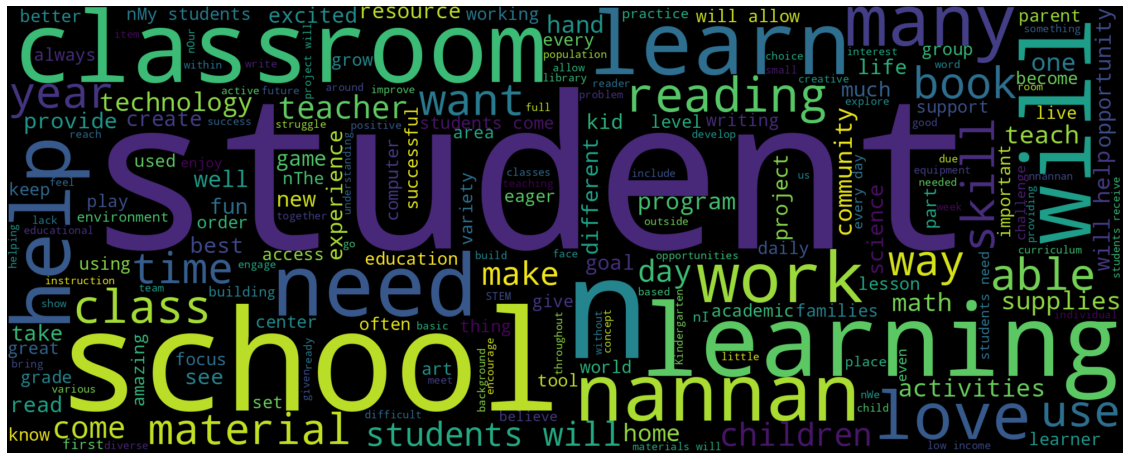

In [215]:
row_indices_of_false_positives_test_data = get_false_positive_indices_from_arr(y_test, y_test_predicted)
# print('row_indices_of_false_positives_test_data ', row_indices_of_false_positives_test_data.shape)

X_test_essays_original_data = X_test['essay'].values
# print('X_test_essays_original_data ', X_test_essays_original_data.shape)

essays_text_of_false_positives_test_data = X_test_essays_original_data[row_indices_of_false_positives_test_data]
# print('essays_text_of_false_positives_test_data ', essays_text_of_false_positives_test_data)

text_generated = generate_word_cloud_from_text(essays_text_of_false_positives_test_data)

wordcloud_plotter(text_generated)

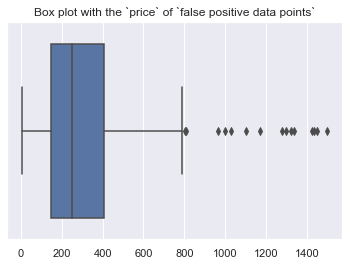

In [216]:
X_test_price_original_data = X_test['price'].values
# print('row_indices_of_false_positves_test_data ', row_indices_of_false_positves_test_data)

price_row_values_of_false_positive_test_data = X_test_price_original_data[row_indices_of_false_positives_test_data]
# print('price_row_values_of_false_positive_test_data ', price_row_values_of_false_positive_test_data)

sns.boxplot(price_row_values_of_false_positive_test_data)

plt.title('Box plot with the `price` of `false positive data points`')

plt.show()

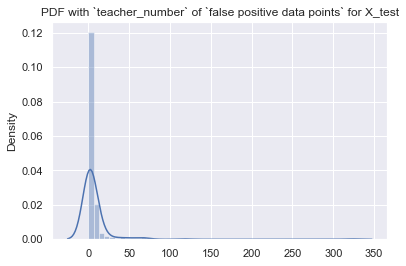

In [217]:
X_test_teacher_number_original_data = X_test['teacher_number_of_previously_posted_projects'].values

teacher_number_values_of_false_positive_test_data = X_test_teacher_number_original_data[row_indices_of_false_positives_test_data]

sns.distplot(teacher_number_values_of_false_positive_test_data)

plt.title('PDF with `teacher_number` of `false positive data points` for X_test')

plt.show()

# Set-2: categorical, numerical features +  essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)

The only change in Set-2 is the "essay" column - Now here I have to calculate the TFIDF W2V instead of just TFIDF

The rest of the Vectorized column will remain same, and hence I just need do the merging with hstack() this new TFIDF W2V column for 'text'

In [218]:
with open(glove_vector_path, 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())
    
# In the TF-IDF Word2Vec vectorization, we have to fit the TfidfVectorizer only on X_train['essay'] and 
# extract 'dictionary' (dictionary with features as the keys and IDF scores as the values) and 
# 'tfidf_words' (a set of all the features extracted from the vectorizer). 
# We have to use the same 'dictionary' and 'tfidf_words' in vectorizing both X_train['essay'] and X_test['essay'].

# Now, at the very top section of this Notebook, we alrady have this code of Vectorizer on X_train data
# vectorizer_essay_tfidf = TfidfVectorizer(min_df=10)
# vectorizer_essay_tfidf.fit(X_train['essay'].values)

# Hence we are now converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(vectorizer_essay_tfidf.get_feature_names(), list(vectorizer_essay_tfidf.idf_)))
tfidf_words = set(vectorizer_essay_tfidf.get_feature_names())     

    
# Function to generate Word2Vec referencing "4_Reference_Vectorization.ipynb" given in the instruction
def generate_w2v_from_text(essays_text_arr):
  # compute average word2vec for each review.
    tfidf_w2v_vectors = []
    # the avg-w2v for each sentence/review is stored in this list

    for sentence in tqdm(essays_text_arr):  # for each sentence
        vector = np.zeros(300)  # as word vectors are of zero length
        tf_idf_weight = 0
        # num of words with a valid vector in the sentence
        for word in sentence.split():  # for each word in a sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word]  # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word] * (
                    sentence.count(word) / len(sentence.split())
                )  # getting the tfidf value for each word
                vector += vec * tf_idf  # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    return tfidf_w2v_vectors
  
X_train_vectorized_tfidf_w2v_essay = generate_w2v_from_text(X_train['essay'].values)
X_test_vectorized_tfidf_w2v_essay = generate_w2v_from_text(X_test['essay'].values)


100%|██████████| 1500/1500 [00:04<00:00, 310.51it/s]


## Merging (with hstack) to construct S2 for TFIDF W2V

In [219]:
X_train_s2_merged = hstack((X_train_vectorized_tfidf_w2v_essay, X_train_vectorized_ohe_school_state, X_train_vectorized_ohe_teacher_prefix, X_train_vectorized_ohe_project_grade_category, X_train_vectorized_ohe_project_subject_categories, X_train_vectorized_ohe_project_subject_subcategories, X_train_normalized_price, X_train_negative_sent_standardized, X_train_positive_sent_standardized, X_train_neutral_sent_standardized, X_train_compound_sent_standardized ))


X_test_s2_merged = hstack((X_test_vectorized_tfidf_w2v_essay, X_test_vectorized_ohe_school_state, X_test_vectorized_ohe_teacher_prefix, X_test_vectorized_ohe_project_grade_category, X_test_vectorized_ohe_project_subject_categories, X_test_vectorized_ohe_project_subject_subcategories , X_test_normalized_price, X_test_negative_sent_standardized, X_test_positive_sent_standardized, X_test_neutral_sent_standardized, X_test_compound_sent_standardized ))


print('X_train_s2_merged.shape ', X_train_s2_merged.shape)
print('X_test_s2_merged.shape ', X_test_s2_merged.shape)

X_train_s2_merged.shape  (3500, 628)
X_test_s2_merged.shape  (1500, 628)


In [220]:
depth_dt_gridsearch = [1, 5, 10, 50]
split_dt_gridsearch = [5, 10, 100, 500]

parameters_dict = { 'max_depth': depth_dt_gridsearch, 'min_samples_split': split_dt_gridsearch }

decision_tree = DecisionTreeClassifier(class_weight='balanced')

clf_s2 = GridSearchCV(decision_tree, parameters_dict, cv=3, scoring='roc_auc', return_train_score=True)

clf_s2.fit(X_train_s2_merged, y_train)

print('Best Params from GridSearchCV for Set S2 ', clf_s2.best_params_)
# Best Params from GridSearchCV for Set S2  {'max_depth': 5, 'min_samples_split': 500}

Best Params from GridSearchCV for Set S2  {'max_depth': 10, 'min_samples_split': 10}


## Heatmap for Set S2 - Plot the performance of model both on train data and cross validation data for each hyper parameter, with rows as min_sample_split, columns as max_depth, and values inside the cell representing AUC Score

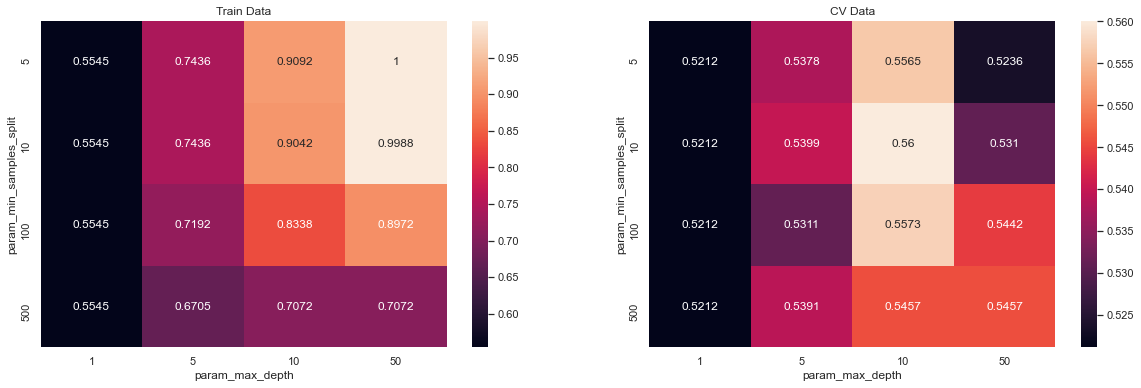

In [221]:
results_from_gridsearchcv = pd.DataFrame(clf_s2.cv_results_)

max_auc_scores = results_from_gridsearchcv.groupby(['param_min_samples_split', 'param_max_depth']).max()

max_auc_scores = max_auc_scores.unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1, 2, figsize=(20, 6))

sns.heatmap(max_auc_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_auc_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Data')
ax[1].set_title('CV Data')
plt.show()


### Set S2 - A basic observtion on the above Heatmap

- For training dataset the best score is coming max_depth = 50 and min_samples_split = 500
- For validation dataset the best score is coming max_depth = 5 and min_samples_split = 500 as given in the GridSearchCV best_params_

## Set S2 - ROC curve - After finding the best hyper parameter, training our model with it, and finding the AUC on test data and plot the ROC curve on both train and test.


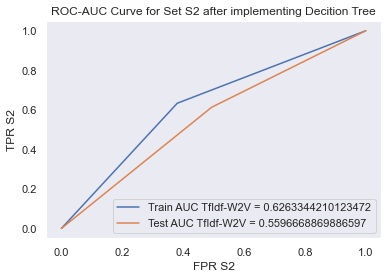

In [222]:
dt_clf_s2 = DecisionTreeClassifier(max_depth=5, min_samples_split=500, class_weight='balanced')
dt_clf_s2.fit(X_train_s1_merged, y_train )

y_train_predicted = dt_clf_s2.predict(X_train_s1_merged)
y_test_predicted_s2 = dt_clf_s2.predict(X_test_s1_merged)

s2_train_fpr, s2_train_tpr, s2_train_threshold = roc_curve(y_train, y_train_predicted)
s2_test_fpr, s2_test_tpr, s2_test_threshold = roc_curve(y_test, y_test_predicted_s2)

plt.plot(s2_train_fpr, s2_train_tpr, label="Train AUC TfIdf-W2V = "+str(auc(s2_train_fpr, s2_train_tpr)))
plt.plot(s2_test_fpr, s2_test_tpr, label="Test AUC TfIdf-W2V = "+str(auc(s2_test_fpr, s2_test_tpr)))
plt.legend()
plt.xlabel('FPR S2')
plt.ylabel('TPR S2')
plt.grid()
plt.title('ROC-AUC Curve for Set S2 after implementing Decition Tree')
plt.show()

## S2 - Confusion matrix with predicted and original labels of test data points

confusion_matrix_s2_train  [[ 332  204]
 [1087 1877]]


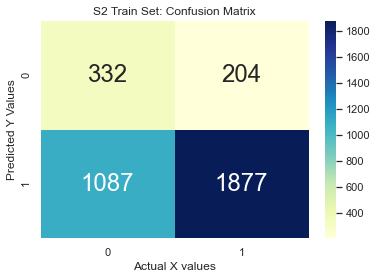

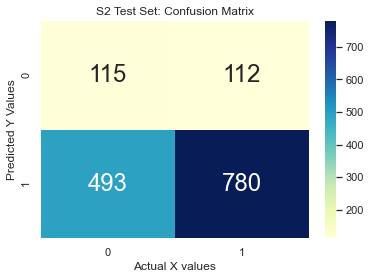

In [223]:
confusion_matrix_s2_train = confusion_matrix(y_train, calculate_y_vector_from_threshold(y_train_predicted, s2_train_threshold, s2_train_fpr, s2_train_tpr ) )

confusion_matrix_s2_test = confusion_matrix(y_test, calculate_y_vector_from_threshold(y_test_predicted_s2, s2_test_threshold, s2_test_fpr, s2_test_tpr ) )

print('confusion_matrix_s2_train ', confusion_matrix_s2_train)
# Heatmap for Confusion Matrix: Train and SET 1
heatmap_confusion_matrix_train_s2 = sns.heatmap(confusion_matrix_s2_train, annot=True, fmt='d', cmap="YlGnBu", annot_kws={"size": 24})

plt.title('S2 Train Set: Confusion Matrix')
plt.xlabel('Actual X values')
plt.ylabel('Predicted Y Values')
plt.show()

heatmap_confusion_matrix_test_s2 = sns.heatmap(confusion_matrix_s2_test, annot=True, fmt='d', cmap="YlGnBu", annot_kws={"size": 24})

plt.title('S2 Test Set: Confusion Matrix')
plt.xlabel('Actual X values')
plt.ylabel('Predicted Y Values')
plt.show()

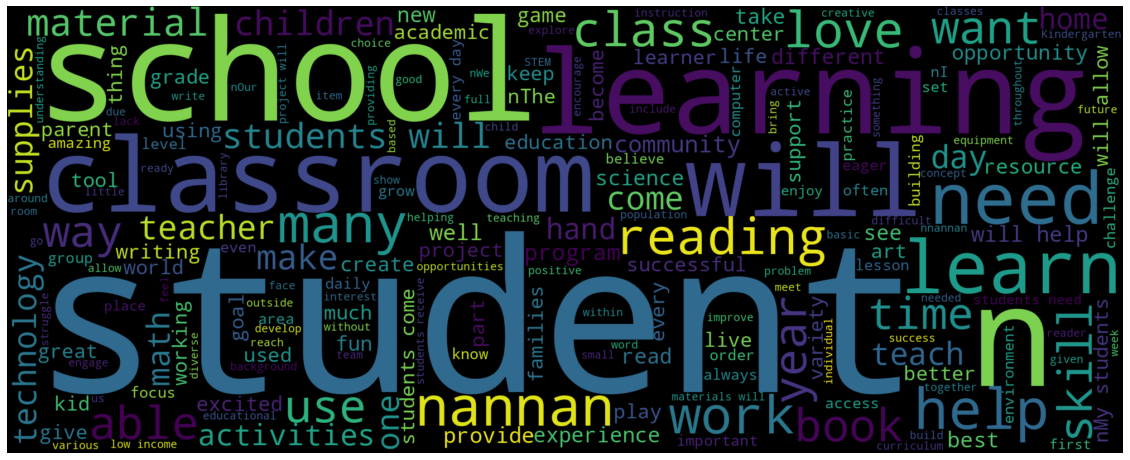

In [224]:
row_indices_of_false_positives_test_data_s2 = get_false_positive_indices_from_arr(y_test, y_test_predicted_s2)

X_test_essays_original_data = X_test['essay'].values
# print('X_test_essays_original_data ', X_test_essays_original_data.shape)

essays_text_of_false_positives_test_data = X_test_essays_original_data[row_indices_of_false_positives_test_data_s2]
# print('essays_text_of_false_positives_test_data ', essays_text_of_false_positives_test_data)

text_generated = generate_word_cloud_from_text(essays_text_of_false_positives_test_data)

wordcloud_plotter(text_generated)

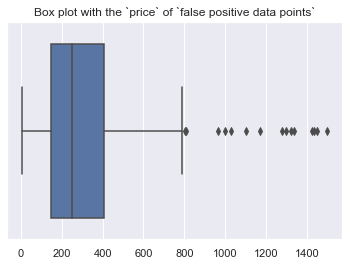

In [225]:
X_test_price_original_data = X_test['price'].values
# print('row_indices_of_false_positves_test_data ', row_indices_of_false_positves_test_data)

price_row_values_of_false_positive_test_data = X_test_price_original_data[row_indices_of_false_positives_test_data_s2]
# print('price_row_values_of_false_positive_test_data ', price_row_values_of_false_positive_test_data)

sns.boxplot(price_row_values_of_false_positive_test_data)

plt.title('Box plot with the `price` of `false positive data points`')

plt.show()

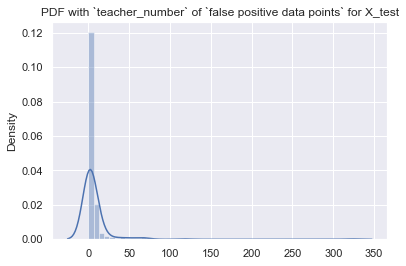

In [226]:
X_test_teacher_number_original_data = X_test['teacher_number_of_previously_posted_projects'].values

teacher_number_values_of_false_positive_test_data = X_test_teacher_number_original_data[row_indices_of_false_positives_test_data_s2]

sns.distplot(teacher_number_values_of_false_positive_test_data)

plt.title('PDF with `teacher_number` of `false positive data points` for X_test')

plt.show()

Now we will do the below

# <font color='red'><b> Calculating Non-zero feature importance on Set-1 Features </b></font>

### Feature Importance on Set-1

*  Selecting all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  Hyperparameter tuning corresponding to the model you selected
  
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  
Summarize the results    

In [227]:
dt_clf = DecisionTreeClassifier(class_weight='balanced')

# As Indexing is not implemented for the coo format. 
# Hence using tocsr() - otherwise later can not access elements by index
# So without it, X_train_s1_merged[:, important_features > 0 ] will throw below error
# 'coo_matrix' object is not subscriptable
X_train_s1_merged_csr = X_train_s1_merged.tocsr()
dt_clf.fit(X_train_s1_merged_csr, y_train)

X_test_s1_merged_csr = X_test_s1_merged.tocsr()

important_features = np.array(dt_clf.feature_importances_)

# print("important_features length ", len(important_features))
# print('X_train_s1_merged ', X_train_s1_merged_csr.shape)

X_train_s1_merged_important_features = X_train_s1_merged_csr[:, important_features > 0 ]
X_test_s1_merged_important_features = X_test_s1_merged_csr[:, important_features > 0 ]

In [228]:

svc = LinearSVC()

# params_svc_gridsearchcv =  {
#   'C': expon(loc=0, scale=4),
# }

hyperparams_svc_gridsearchcv =  {
  "C": np.logspace(0, 4, 10)
}

gridsearch_svc = GridSearchCV(svc, hyperparams_svc_gridsearchcv, cv=3)

gridsearch_svc.fit(X_train_s1_merged_important_features, y_train )

print('Best Params from GridSearchCV with Important Features ', gridsearch_svc.best_params_)

Best Params from GridSearchCV with Important Features  {'C': 2.7825594022071245}


Text(0.5, 0, 'False Positive Rate Imp_features')

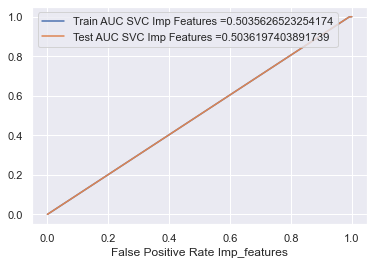

In [229]:
svc = LinearSVC(C=1)
svc.fit(X_train_s1_merged_important_features, y_train )

y_train_predicted = svc.predict(X_train_s1_merged_important_features)
y_test_predicted = svc.predict(X_test_s1_merged_important_features)


train_fpr_imp_features, train_tpr_imp_features, train_thresholds_imp_features = roc_curve(y_train, y_train_predicted)

test_fpr_imp_features, test_tpr_imp_features, test_thresholds_imp_features = roc_curve(y_test, y_test_predicted)

plt.plot(train_fpr_imp_features, train_tpr_imp_features, label="Train AUC SVC Imp Features ="+str(auc(train_fpr_imp_features, train_tpr_imp_features)))

plt.plot(test_fpr_imp_features, test_tpr_imp_features, label="Test AUC SVC Imp Features ="+str(auc(test_fpr_imp_features, test_tpr_imp_features)))

plt.legend()

plt.xlabel("False Positive Rate Imp_features")


In [230]:
confusion_matrix(y_train, y_train_predicted)

array([[   4,  532],
       [   1, 2963]])

In [231]:
confusion_matrix(y_test, y_test_predicted)

array([[   2,  225],
       [   2, 1271]])

In [232]:
import pandas as pd

pd.DataFrame({
  'Model':['TfIdf',  'Tfidf-W2V', 'LinearSVC'],
  'Train AUC': [0.64, 0.59, 0.53],
  'Test AUC': [0.60, 0.58, 0.52],
})

Model  Train AUC  Test AUC
0      TfIdf       0.64      0.60
1  Tfidf-W2V       0.59      0.58
2  LinearSVC       0.53      0.52